https://www.kaggle.com/karthik3890/text-clustering#Introduction

In [1]:
from Database import db_mongo

import string

db = db_mongo.db_mongo()

df = db.get_text(100000000)

df["text"] = [word.replace("\n"," ").replace("\x0c"," ") for word in df["text"] if word not in string.punctuation]

Init DB


In [2]:
df_content = df["text"]

df_labels = df["class"]

In [3]:
# find sentences containing HTML tags
import re
i=0;
for sent in df_content.values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

8599
Experience Consultant Account 12/2014 to Current Company Name  e Responsible for strategic and tactical execution of project management initiatives that support the account management workgroup.  e Define project scope, goals and deliverables that support business goals in collaboration with leadership and key stakeholders.  e Drive online portal utilization strategies and approaches to increase business autormation.  e Launched a Core Team to the promote business automation - up 20 pomts (Q1 44% - Q2 64%) Drive and evaluate best practices and determine approaches for customer relationships.  e Driving record breaking results for Customer Loyalty Index (South #1 at 9.73%) and a record breaking survey score for the South's Net Promoter Score of 83% Drive and evaluate ways to minimize churn, to protect Verizon's customer base Audit and Certify action plan initiative that will drive the desired results Collaborate with field partners to drive opportunities and penetration into VES ac

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))



def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'ain', "couldn't", 'same', 'm', 'my', 'we', 'myself', 'mightn', 'off', 'him', 'because', 'above', "don't", "needn't", 'have', 'wouldn', 'below', 'being', 'was', "should've", "mightn't", 'a', 'if', 'is', 'aren', 'needn', 'so', 'too', 'nor', 'yours', 'but', 'don', 'y', 'after', "she's", 'no', 'should', 'be', 'both', 'once', 'some', 'hadn', 'any', 'i', 'of', 'here', 'wasn', 'there', 'she', 'the', 'at', 'who', 'to', "won't", 'for', 'had', 'herself', 'while', 'her', 's', 'shouldn', "wouldn't", 'few', 'very', 'hers', 'they', 're', 'until', 'were', 'on', 'only', 'won', 'yourselves', 'his', "doesn't", 't', 'that', 'mustn', "mustn't", 'having', 'do', "shouldn't", 'as', 'himself', 'them', 'does', 'between', 'over', 'about', 'other', 'more', "you'll", 'by', 'with', 'from', 'then', 'd', 'an', 'these', 'under', 'such', "shan't", "hasn't", 'this', 'its', 'during', 'which', 'll', 've', 'most', 'than', 'our', 'where', 'me', 'haven', "wasn't", 'o', 'before', 'out', 'did', 'didn', 'itself', 'again', 'a

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kguttas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df_content = [cleanhtml(word) for word in df_content ]
df_content = [cleanpunc(word) for word in df_content ]

In [6]:
df_content

['Academic  ANSYS  AutoCAD  basic  CNC  Direction  Documentation  Drafting  DSC  Engineer  Laser  Lathe  layout  MATLAB  Mechanical  Excel  Microsoft Office  PowerPoint  power point  Word  Microstation  Mill  Oil  organizing  profit  Research  scanning  schematics  Scheme  Solidworks  specification  System Design  unique  ',
 'Academic  ANSYS  AutoCAD  basic  CNC  Direction  Documentation  Drafting  DSC  Engineer  Laser  Lathe  layout  MATLAB  Mechanical  Excel  Microsoft Office  PowerPoint  power point  Word  Microstation  Mill  Oil  organizing  profit  Research  scanning  schematics  Scheme  Solidworks  specification  System Design  unique  ',
 '08 2014 to 12 2014 Company Name e Sponsored by New York State Energy Research and Development Authority  NYSERDA  as a part of advance innovative energy  solutions Reviewed the existing literature on the different pyrolysis models used to characterize biomass Performed heating experiments using a DSC-TGA to study the pyrolysis of BioBlock Usi

In [7]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(df_content)
bow.shape

(33640, 55837)

In [8]:
# to understand what kind of words generated as columns by BOW
terms = count_vect.get_feature_names()

In [9]:
#first 10 columns generated by BOW
terms[1:10]

['000', '0001', '00019', '0008', '000a', '000sq', '000sqft', '001', '0010']

In [10]:
#using all processes jobs=-1 and k means++ for starting initilization advantage
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

/home/kguttas/anaconda3/envs/practica/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(n_clusters=10, n_jobs=-1, random_state=99)

In [11]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [12]:
cluster_center

array([[6.86891815e-03, 8.64338867e-02, 5.72409845e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.07014846e-03, 6.21044538e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.91470988e-05],
       [1.39664804e-02, 1.75046555e-01, 9.31098696e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.46375267e-03, 2.49200426e-02, 0.00000000e+00, ...,
        1.33262260e-04, 0.00000000e+00, 1.33262260e-04],
       [1.23152709e-02, 2.53694581e-01, 0.00000000e+00, ...,
        0.00000000e+00, 2.46305419e-03, 0.00000000e+00],
       [2.94573643e-02, 2.31007752e-01, 1.55038760e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [13]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [14]:
# which tells us that clusters are far away from each other 
silhouette_score

0.11338298401751627

In [16]:
# Giving Labels/assigning a cluster to each point/text 
df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df.head(2)

,_id,text,class,Bow Clus Label
0,ee9c6ab0-02d3-4dbc-8ff6-374c02568e38,"Academic, ANSYS, AutoCAD, basic, CNC, Directio...",ENGINEERING,1
1,d2a8dbed-8ea0-40b5-9cd4-2f374558154f,"Academic, ANSYS, AutoCAD, basic, CNC, Directio...",ENGINEERING,1


In [17]:
#Refrence credit - to find the top 10 features of cluster centriod
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: and
 to
 of
 for
 the
 in
 with
 management
 on
 as
Cluster 1: and
 to
 state
 of
 city
 company
 management
 name
 skills
 in
Cluster 2: and
 to
 of
 for
 the
 in
 with
 company
 state
 city
Cluster 3: and
 the
 of
 to
 in
 for
 with
 as
 on
 project
Cluster 4: and
 the
 to
 of
 in
 for
 with
 as
 on
 state
Cluster 5: and
 to
 of
 the
 for
 in
 with
 company
 all
 on
Cluster 6: and
 to
 of
 the
 in
 for
 with
 management
 on
 as
Cluster 7: and
 of
 to
 the
 in
 for
 with
 management
 skills
 as
Cluster 8: and
 the
 to
 of
 for
 in
 with
 as
 company
 on
Cluster 9: and
 to
 of
 for
 the
 in
 with
 company
 state
 city


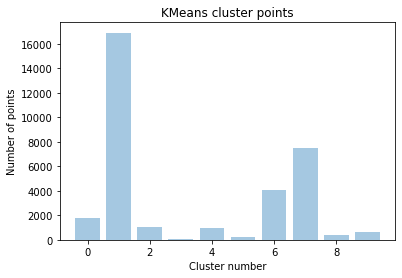

In [19]:
# visually how points or reviews are distributed across 10 clusters 
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [21]:
# Reading a review which belong to each group.
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['Bow Clus Label']).groups[i][0]]['text'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
e Career Summary Accomplished Professional with P&L responsibility in domestic and international Fortune 500 companies.  e Extensive experience and strength in financial management, financial reporting, internal auditing, management reporting, manufacturing, mergers and acquisitions, organizational development, quality assurance, system development, and implementation.  e Record of re-aligning organizations to achieve better economics of scale, including management of turnarounds and shutdowns.  e Skilled in creating strategic plans and in leading high performance teams to exceed pre-set goals.  e Proven instincts to identify and solve unique business issues.  e Key Accomplishments Oversaw the general finance functions and supported the execution of a division's financial and strategic plans; the division generated more than 2 Billion dollars in revenue.  e Uncovered and proved emb

K means using TFIDF

In [22]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df_content)
tfidf.shape

(33640, 55837)

In [23]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

/home/kguttas/anaconda3/envs/practica/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(n_clusters=10, n_jobs=-1, random_state=99)

In [24]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [25]:
cluster_center_tf

array([[6.33409280e-04, 2.13454529e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.25644136e-05],
       [6.81162626e-04, 5.30958412e-03, 3.81979316e-05, ...,
        0.00000000e+00, 3.86681100e-05, 0.00000000e+00],
       [2.75274589e-04, 4.87829532e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.97014368e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.89751454e-05, 2.00888875e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.32012452e-04, 4.80576091e-03, 1.17215806e-05, ...,
        3.99034712e-05, 0.00000000e+00, 0.00000000e+00]])

In [26]:
# to understand what kind of words generated as columns by BOW
terms1 = tfidf_vect.get_feature_names()

In [27]:
terms1[1:10]

['000', '0001', '00019', '0008', '000a', '000sq', '000sqft', '001', '0010']

In [28]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [29]:
silhouette_score_tf

0.0027003841131211376

In [30]:
# Giving Labels/assigning a cluster to each point/text 
df1 = df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

,_id,text,class,Bow Clus Label,Tfidf Clus Label
0,ee9c6ab0-02d3-4dbc-8ff6-374c02568e38,"Academic, ANSYS, AutoCAD, basic, CNC, Directio...",ENGINEERING,1,2
1,d2a8dbed-8ea0-40b5-9cd4-2f374558154f,"Academic, ANSYS, AutoCAD, basic, CNC, Directio...",ENGINEERING,1,2
2,c747b25a-e364-4d5a-85d4-7dd55cb5ad34,08/2014 to 12/2014 Company Name e Sponsored by...,ENGINEERING,4,9
3,3afdc747-4428-405d-a83b-cb1d08715268,Education Master of Science : Mechanical Engi...,ENGINEERING,7,5
4,d2cf4171-b3b9-4fda-9199-2563ee67f48e,e Sponsored by New York State Energy Research ...,ENGINEERING,4,9


In [32]:
# How many points belong to each cluster ->

df1.groupby(['Tfidf Clus Label'])['text'].count()

Tfidf Clus Label
0    7834
1    4594
2    2907
3     711
4    1245
5    1982
6    3693
7     400
8    2226
9    8048
Name: text, dtype: int64

In [33]:
#Refrence credit - to find the top 10 features of cluster centriod
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: and
 of
 in
 for
 to
 the
 with
 management
 skills
 certified
Cluster 1: and
 to
 the
 of
 for
 with
 in
 all
 company
 on
Cluster 2: management
 microsoft
 office
 excel
 marketing
 skills
 word
 sales
 financial
 and
Cluster 3: january
 name
 company
 city
 state
 to
 manager
 2009
 2007
 2013
Cluster 4: name
 company
 to
 city
 state
 september
 august
 november
 october
 march
Cluster 5: state
 university
 city
 education
 of
 science
 bachelor
 gpa
 arts
 college
Cluster 6: and
 skills
 in
 with
 to
 management
 strong
 experience
 of
 professional
Cluster 7: school
 high
 diploma
 city
 state
 education
 college
 skills
 usa
 general
Cluster 8: name
 company
 city
 state
 to
 current
 01
 experience
 manager
 2015
Cluster 9: and
 the
 to
 of
 for
 in
 with
 as
 on
 all


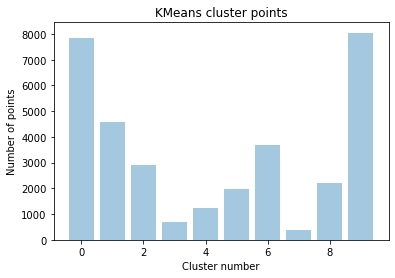

In [34]:
# visually how points or reviews are distributed across 10 clusters 

plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [35]:
# Reading a review which belong to each group.
for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['text'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][10]]['text'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][20]]['text'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
e Calculate equation of state using measured crude oil properties.  e Upscale reservorr static model using Petrel.  e Collect and generate input data for compositional simulations  e History-match reservoir model to field data and estimate hydrocarbon reserves.  e Conduct coupled flow- geomechanical reservoir simulation of CO2-EOR and storage using Visage. e Analyze simulation results and evaluate changes in reservorr stress and strain  e Correlate predicted geomechanical stress changes with bserved microseismicity  e Conduct simulation studies to evaluate impact of inflow-control-devices on well injectivity.  


Miscible and immiscible CO2 EOR pilots Fields: Mumford Hills (Clore sandstone) and Sugar Creek (Jackson sandstone). Operator: Gallagher Drilling Inc, Evansville Indiana  


a€¢Responsible for cash management, including monitoring sweep account activity, direct deposits, lo